In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import array

In [2]:
# 기온 데이터 읽어 들이기
df = pd.read_csv('tem10y.csv', encoding="utf-8")

In [3]:
# 데이터를 학습 전용과 테스트 전용으로 분리하기 ---(*1)
train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)

In [4]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
     # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
     break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [5]:
type(list(df[train_year]['기온']))

list

In [6]:
n_steps = 100
train_x, train_y = split_sequence(list(df[train_year]['기온']), n_steps)
test_x, test_y = split_sequence(list(df[test_year]['기온']), n_steps)

In [7]:
train_x.shape

(3552, 100)

In [12]:
train_x

array([[ 3.6,  4. ,  3.7, ..., 12.5, 12.9, 10.4],
       [ 4. ,  3.7,  4. , ..., 12.9, 10.4, 11.6],
       [ 3.7,  4. ,  3.6, ..., 10.4, 11.6, 15.1],
       ...,
       [23.3, 22.7, 23. , ...,  8.5,  7.3,  6. ],
       [22.7, 23. , 22.4, ...,  7.3,  6. ,  6.3],
       [23. , 22.4, 20.4, ...,  6. ,  6.3,  7.2]])

In [56]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [63]:
model.fit(train_x, train_y, epochs=200, verbose=1)

Epoch 1/200
3552/3552 [==============================] - 0s 99us/step - loss: 2.7567 - acc: 0.0239
Epoch 2/200
3552/3552 [==============================] - 0s 75us/step - loss: 2.9656 - acc: 0.0197
Epoch 3/200
3552/3552 [==============================] - 0s 61us/step - loss: 2.8102 - acc: 0.0231
Epoch 4/200
3552/3552 [==============================] - 0s 66us/step - loss: 2.8971 - acc: 0.0208
Epoch 5/200
3552/3552 [==============================] - 0s 79us/step - loss: 2.8872 - acc: 0.0270
Epoch 6/200
3552/3552 [==============================] - 0s 66us/step - loss: 2.9127 - acc: 0.0242
Epoch 7/200
3552/3552 [==============================] - 0s 66us/step - loss: 2.7773 - acc: 0.0245
Epoch 8/200
3552/3552 [==============================] - 0s 61us/step - loss: 2.8700 - acc: 0.0267
Epoch 9/200
3552/3552 [==============================] - 0s 77us/step - loss: 2.9076 - acc: 0.0259
Epoch 10/200
3552/3552 [==============================] - 0s 70us/step - loss: 2.8938 - acc: 0.0228
Epoch 11/

Epoch 83/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.6304 - acc: 0.0248
Epoch 84/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.6607 - acc: 0.0242
Epoch 85/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.6091 - acc: 0.0276
Epoch 86/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.5736 - acc: 0.0251
Epoch 87/200
3552/3552 [==============================] - 0s 48us/step - loss: 2.7279 - acc: 0.0239
Epoch 88/200
3552/3552 [==============================] - 0s 40us/step - loss: 2.8775 - acc: 0.0231
Epoch 89/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.6158 - acc: 0.0248
Epoch 90/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.6098 - acc: 0.0242
Epoch 91/200
3552/3552 [==============================] - 0s 40us/step - loss: 2.6615 - acc: 0.0265
Epoch 92/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.5796 - acc: 0.0248


3552/3552 [==============================] - 0s 57us/step - loss: 2.5670 - acc: 0.0287
Epoch 165/200
3552/3552 [==============================] - 0s 53us/step - loss: 2.7090 - acc: 0.0228
Epoch 166/200
3552/3552 [==============================] - 0s 53us/step - loss: 2.5238 - acc: 0.0239
Epoch 167/200
3552/3552 [==============================] - 0s 53us/step - loss: 2.6653 - acc: 0.0270
Epoch 168/200
3552/3552 [==============================] - 0s 48us/step - loss: 2.4423 - acc: 0.0262
Epoch 169/200
3552/3552 [==============================] - 0s 53us/step - loss: 2.3751 - acc: 0.0279
Epoch 170/200
3552/3552 [==============================] - 0s 53us/step - loss: 2.4668 - acc: 0.0253
Epoch 171/200
3552/3552 [==============================] - 0s 57us/step - loss: 2.4767 - acc: 0.0262
Epoch 172/200
3552/3552 [==============================] - 0s 44us/step - loss: 2.4489 - acc: 0.0236
Epoch 173/200
3552/3552 [==============================] - 0s 48us/step - loss: 2.5550 - acc: 0.0236
Epoc

In [58]:
yhat = model.predict(test_x, verbose=0)
yhat[:5]

array([[16.027193],
       [16.510397],
       [11.007207],
       [13.030264],
       [11.647767]], dtype=float32)

In [37]:
aa = array([[1,2,3],[4,5,6]])
aa

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
type(aa)

numpy.ndarray

In [40]:
list(aa[0])

[1, 2, 3]

In [35]:
yhat

array([[16.789822 ],
       [17.609924 ],
       [12.725194 ],
       [12.717243 ],
       [15.15221  ],
       [15.356193 ],
       [17.748333 ],
       [16.322018 ],
       [20.355091 ],
       [18.452782 ],
       [16.884804 ],
       [16.069689 ],
       [17.59662  ],
       [18.175552 ],
       [16.662813 ],
       [17.482658 ],
       [17.904087 ],
       [18.773098 ],
       [19.18637  ],
       [13.715744 ],
       [16.173265 ],
       [16.402386 ],
       [18.112724 ],
       [18.12388  ],
       [20.211481 ],
       [20.945349 ],
       [21.681528 ],
       [19.179647 ],
       [20.311821 ],
       [19.553919 ],
       [18.912699 ],
       [20.03968  ],
       [21.243011 ],
       [20.990562 ],
       [20.297419 ],
       [18.946018 ],
       [18.229212 ],
       [20.285543 ],
       [20.819304 ],
       [21.271006 ],
       [20.075333 ],
       [18.814718 ],
       [20.160778 ],
       [23.118326 ],
       [23.753712 ],
       [21.771154 ],
       [22.086554 ],
       [22.48

In [27]:
type(yhat)

numpy.ndarray

In [43]:
list(yhat[:,0])

[16.789822,
 17.609924,
 12.725194,
 12.717243,
 15.15221,
 15.356193,
 17.748333,
 16.322018,
 20.355091,
 18.452782,
 16.884804,
 16.069689,
 17.59662,
 18.175552,
 16.662813,
 17.482658,
 17.904087,
 18.773098,
 19.18637,
 13.715744,
 16.173265,
 16.402386,
 18.112724,
 18.12388,
 20.211481,
 20.945349,
 21.681528,
 19.179647,
 20.311821,
 19.553919,
 18.912699,
 20.03968,
 21.243011,
 20.990562,
 20.297419,
 18.946018,
 18.229212,
 20.285543,
 20.819304,
 21.271006,
 20.075333,
 18.814718,
 20.160778,
 23.118326,
 23.753712,
 21.771154,
 22.086554,
 22.48184,
 20.453516,
 20.767105,
 22.51827,
 18.098083,
 20.409824,
 21.193262,
 21.116514,
 20.44122,
 22.21196,
 20.831104,
 21.085474,
 20.631878,
 21.557499,
 21.309292,
 22.073545,
 22.923475,
 23.093197,
 20.38515,
 22.626484,
 21.12957,
 22.289787,
 24.0544,
 25.198881,
 23.667068,
 23.693695,
 23.29794,
 23.185593,
 23.256527,
 22.928741,
 24.776335,
 24.036936,
 23.78706,
 20.701073,
 22.40705,
 23.47777,
 25.279476,
 25.90017

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(test_y, yhat)

0.904593484464413

In [52]:
test_x.dtype

dtype('float64')

In [61]:
loss, acc = model.evaluate(test_x, test_y, verbose=0)

In [62]:
loss, acc

(4.048187822327578, 0.026315789529703613)

In [16]:
np.polyfit(list(yhat), list(test_x), deg=1)

TypeError: expected 1D vector for x

In [66]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [67]:
polyfit(test_x, yhat, 1)

TypeError: expected 1D vector for x

In [61]:
model.

IndexError: list index out of range

In [22]:
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

In [29]:
df[train_year]

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
5,2006,1,6,2.1,8,1
6,2006,1,7,2.8,8,1
7,2006,1,8,4.2,8,1
8,2006,1,9,3.7,8,1
9,2006,1,10,4.3,8,1


In [23]:
interval = 50
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [32]:
train_x

[[3.6,
  4.0,
  3.7,
  4.0,
  3.6,
  2.1,
  2.8,
  4.2,
  3.7,
  4.3,
  6.1,
  6.1,
  4.0,
  6.6,
  10.7,
  9.0,
  8.0,
  5.6,
  4.2,
  4.0,
  1.3,
  3.1,
  2.5,
  4.4,
  5.5,
  6.0,
  6.8,
  5.5,
  6.0,
  8.4,
  7.1,
  5.7,
  7.8,
  6.0,
  1.6,
  1.9,
  2.0,
  3.6,
  7.9,
  4.6,
  5.6,
  7.5,
  4.6,
  5.7,
  10.5,
  14.1,
  7.5,
  7.0,
  4.4,
  7.0],
 [4.0,
  3.7,
  4.0,
  3.6,
  2.1,
  2.8,
  4.2,
  3.7,
  4.3,
  6.1,
  6.1,
  4.0,
  6.6,
  10.7,
  9.0,
  8.0,
  5.6,
  4.2,
  4.0,
  1.3,
  3.1,
  2.5,
  4.4,
  5.5,
  6.0,
  6.8,
  5.5,
  6.0,
  8.4,
  7.1,
  5.7,
  7.8,
  6.0,
  1.6,
  1.9,
  2.0,
  3.6,
  7.9,
  4.6,
  5.6,
  7.5,
  4.6,
  5.7,
  10.5,
  14.1,
  7.5,
  7.0,
  4.4,
  7.0,
  6.4],
 [3.7,
  4.0,
  3.6,
  2.1,
  2.8,
  4.2,
  3.7,
  4.3,
  6.1,
  6.1,
  4.0,
  6.6,
  10.7,
  9.0,
  8.0,
  5.6,
  4.2,
  4.0,
  1.3,
  3.1,
  2.5,
  4.4,
  5.5,
  6.0,
  6.8,
  5.5,
  6.0,
  8.4,
  7.1,
  5.7,
  7.8,
  6.0,
  1.6,
  1.9,
  2.0,
  3.6,
  7.9,
  4.6,
  5.6,
  7.5,
  4.6,
  5.

In [33]:
train_y

[6.4,
 8.0,
 10.8,
 11.2,
 6.5,
 7.8,
 7.5,
 8.6,
 4.6,
 5.7,
 8.2,
 6.4,
 6.7,
 8.3,
 11.8,
 9.9,
 12.3,
 8.9,
 8.0,
 11.6,
 13.8,
 5.5,
 5.3,
 8.4,
 11.7,
 13.2,
 12.3,
 9.7,
 8.5,
 11.7,
 10.3,
 10.4,
 11.2,
 10.7,
 13.6,
 12.3,
 13.0,
 9.8,
 8.0,
 8.0,
 10.7,
 13.3,
 13.8,
 15.2,
 11.6,
 11.6,
 9.8,
 12.5,
 12.9,
 10.4,
 11.6,
 15.1,
 17.4,
 13.0,
 10.1,
 9.6,
 13.7,
 16.4,
 17.8,
 16.3,
 12.9,
 13.7,
 14.4,
 16.4,
 12.1,
 14.0,
 13.0,
 15.9,
 15.8,
 18.3,
 23.1,
 15.5,
 13.5,
 16.7,
 20.0,
 20.4,
 18.8,
 16.1,
 15.0,
 18.8,
 21.2,
 17.2,
 12.9,
 15.7,
 19.1,
 18.7,
 18.5,
 17.3,
 19.0,
 23.7,
 21.7,
 20.4,
 20.9,
 20.2,
 18.5,
 19.4,
 17.8,
 20.4,
 22.7,
 21.9,
 22.7,
 23.1,
 22.2,
 19.2,
 18.3,
 19.0,
 20.4,
 20.2,
 20.1,
 19.3,
 23.2,
 19.4,
 20.5,
 21.5,
 22.6,
 22.2,
 22.4,
 24.5,
 21.3,
 23.7,
 24.9,
 23.3,
 23.6,
 23.4,
 24.8,
 23.5,
 22.9,
 24.8,
 26.5,
 27.4,
 26.6,
 26.1,
 26.6,
 26.0,
 25.3,
 23.1,
 24.7,
 25.8,
 26.0,
 24.7,
 26.2,
 27.5,
 28.3,
 28.9,
 30.4,
 30.2,
 28

In [25]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=interval)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.fit(train_x, train_y, epochs=200, verbose=0)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 3602 arrays: [array([[ 3.6],
       [ 4. ],
       [ 3.7],
       [ 4. ],
       [ 3.6],
       [ 2.1],
       [ 2.8],
       [ 4.2],
       [ 3.7],
       [ 4.3],
       [ 6.1],
       [ 6.1],
       [ 4. ],
    ...

In [6]:
# 과거 6일의 데이터를 기반으로 학습할 데이터 만들기 ---(*2)
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)


In [11]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [14]:
df[train_year][:10], train_x[:10], train_y[:10]

(      연  월   일   기온  품질  균질
 0  2006  1   1  3.6   8   1
 1  2006  1   2  4.0   8   1
 2  2006  1   3  3.7   8   1
 3  2006  1   4  4.0   8   1
 4  2006  1   5  3.6   8   1
 5  2006  1   6  2.1   8   1
 6  2006  1   7  2.8   8   1
 7  2006  1   8  4.2   8   1
 8  2006  1   9  3.7   8   1
 9  2006  1  10  4.3   8   1,
 [[3.6, 4.0, 3.7],
  [4.0, 3.7, 4.0],
  [3.7, 4.0, 3.6],
  [4.0, 3.6, 2.1],
  [3.6, 2.1, 2.8],
  [2.1, 2.8, 4.2],
  [2.8, 4.2, 3.7],
  [4.2, 3.7, 4.3],
  [3.7, 4.3, 6.1],
  [4.3, 6.1, 6.1]],
 [4.0, 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1, 4.0])

# (2)

In [15]:
from sklearn.linear_model import LinearRegression

In [33]:
rfc = LinearRegression()
rfc.fit(train_x, train_y)
rfc.score(test_x, test_y)

0.916555363635416

In [34]:
pred = pd.DataFrame(test_y)
pred['y_rfc'] =rfc.predict(test_x)
pred[:5]

,0,y_rfc
0,7.3,7.805610
1,9.3,7.612255
2,9.2,9.545804
3,10.9,9.449126
4,8.9,11.092642


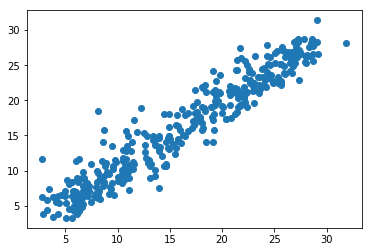

In [35]:
plt.scatter(pred[0], pred['y_rfc'])

# (3)

In [45]:
for i in range(1, 13) :
    interval = i
    train_x, train_y = make_data(df[train_year])
    test_x, test_y = make_data(df[test_year])
    rfc = LinearRegression()
    rfc.fit(train_x, train_y)
    score = rfc.score(test_x, test_y)
    coef = rfc.coef_
    print(f'interval={i}, Score= {score :.6f}, {coef}')
#     print(score.max())
    

interval=1, Score= 0.916555, [0.9667742]
interval=2, Score= 0.916581, [0.06286328 0.90597858]
interval=3, Score= 0.919901, [ 0.22511715 -0.14119798  0.89183702]
interval=4, Score= 0.921527, [ 0.11401055  0.12340854 -0.12510785  0.86617053]
interval=5, Score= 0.922325, [ 0.12199785  0.00826696  0.13868428 -0.14019032  0.8522554 ]
interval=6, Score= 0.923476, [ 0.11170987  0.02668439  0.02397893  0.12310026 -0.14104183  0.83853625]
interval=7, Score= 0.924459, [ 0.07983458  0.04476044  0.03792477  0.01413321  0.12117179 -0.14317956
  0.82962209]
interval=8, Score= 0.925395, [ 0.06612609  0.02499532  0.0541802   0.02992153  0.01316744  0.11861554
 -0.14604442  0.82433295]
interval=9, Score= 0.924817, [ 0.06193752  0.01503936  0.03402964  0.04680309  0.02910416  0.01136048
  0.11518242 -0.14762344  0.82028543]
interval=10, Score= 0.924763, [ 0.05184982  0.01938119  0.02267273  0.0281031   0.04617382  0.02758315
  0.00897769  0.11342586 -0.14843499  0.81708464]
interval=11, Score= 0.924513,

In [50]:
interval = 180
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])
rfc = LinearRegression()
rfc.fit(train_x, train_y)
score = rfc.score(test_x, test_y)
score

0.9293502347010671